In [11]:
from neuralnet import NeuralNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.describe(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


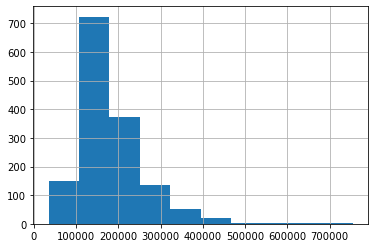

In [4]:
train['SalePrice'].hist()

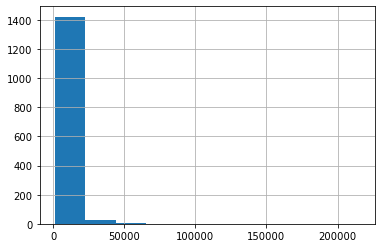

In [5]:
train['LotArea'].hist()

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
X = train['LotArea'].values.reshape(-1,1)
y = train['SalePrice'].values.reshape(-1,1)

In [10]:
# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Initialize the NeuralNet class
eta = 0.1
n_iter = 200
layer_sizes = [X_train.shape[1], 64, 32, 1]  # Example layer sizes
neural_net = NeuralNet(X_train, y_train, layer_sizes, eta=eta, n_iter=n_iter, initialization_method='he', lambd=0.01)

In [18]:
# Train the neural network
neural_net.train(batch_size=32)

Epoch 1/200, Batch 1/31, Loss: 45329428925.99143
Epoch 1/200, Batch 11/31, Loss: 15722886678.021412
Epoch 1/200, Batch 21/31, Loss: 6566582724.1665535
Epoch 1/200, Batch 31/31, Loss: 6688512590.972523
Epoch 2/200, Batch 1/31, Loss: 7803151785.287273
Epoch 2/200, Batch 11/31, Loss: 11531033415.238583
Epoch 2/200, Batch 21/31, Loss: 6402658525.801111
Epoch 2/200, Batch 31/31, Loss: 11332076702.154839
Epoch 3/200, Batch 1/31, Loss: 6753297030.02997
Epoch 3/200, Batch 11/31, Loss: 7010812848.268313
Epoch 3/200, Batch 21/31, Loss: 6391843798.864849
Epoch 3/200, Batch 31/31, Loss: 8582151008.092604
Epoch 4/200, Batch 1/31, Loss: 4898445303.879947
Epoch 4/200, Batch 11/31, Loss: 6769783441.3413315
Epoch 4/200, Batch 21/31, Loss: 8021036585.424683
Epoch 4/200, Batch 31/31, Loss: 5258704484.897156
Epoch 5/200, Batch 1/31, Loss: 6385529797.298807
Epoch 5/200, Batch 11/31, Loss: 6088077381.149566
Epoch 5/200, Batch 21/31, Loss: 8181988486.172783
Epoch 5/200, Batch 31/31, Loss: 7184384912.592484
E

Epoch 60/200, Batch 21/31, Loss: 4547183616.779239
Epoch 60/200, Batch 31/31, Loss: 5840676884.45004
Epoch 61/200, Batch 1/31, Loss: 5726942443.811956
Epoch 61/200, Batch 11/31, Loss: 6060845094.804947
Epoch 61/200, Batch 21/31, Loss: 4652175038.155274
Epoch 61/200, Batch 31/31, Loss: 5476736856.869629
Epoch 62/200, Batch 1/31, Loss: 9081333544.123749
Epoch 62/200, Batch 11/31, Loss: 8691449302.130335
Epoch 62/200, Batch 21/31, Loss: 8856841046.91668
Epoch 62/200, Batch 31/31, Loss: 14839896972.23678
Epoch 63/200, Batch 1/31, Loss: 7903858333.1596775
Epoch 63/200, Batch 11/31, Loss: 18242202183.438988
Epoch 63/200, Batch 21/31, Loss: 5800912726.829262
Epoch 63/200, Batch 31/31, Loss: 5251669693.942017
Epoch 64/200, Batch 1/31, Loss: 3716621037.843483
Epoch 64/200, Batch 11/31, Loss: 7998514499.02213
Epoch 64/200, Batch 21/31, Loss: 13357334292.597336
Epoch 64/200, Batch 31/31, Loss: 5518500033.634127
Epoch 65/200, Batch 1/31, Loss: 8104099472.819566
Epoch 65/200, Batch 11/31, Loss: 392

Epoch 122/200, Batch 1/31, Loss: 5000301554.656865
Epoch 122/200, Batch 11/31, Loss: 28822730107.3349
Epoch 122/200, Batch 21/31, Loss: 6652055024.865294
Epoch 122/200, Batch 31/31, Loss: 4714711633.416212
Epoch 123/200, Batch 1/31, Loss: 7863236626.659098
Epoch 123/200, Batch 11/31, Loss: 17499971444.147606
Epoch 123/200, Batch 21/31, Loss: 5328733114.751759
Epoch 123/200, Batch 31/31, Loss: 9926859709.910807
Epoch 124/200, Batch 1/31, Loss: 7144103433.595799
Epoch 124/200, Batch 11/31, Loss: 7889791213.311755
Epoch 124/200, Batch 21/31, Loss: 8804381108.441036
Epoch 124/200, Batch 31/31, Loss: 6840342861.710465
Epoch 125/200, Batch 1/31, Loss: 12657044447.847628
Epoch 125/200, Batch 11/31, Loss: 8007493473.149862
Epoch 125/200, Batch 21/31, Loss: 4696193532.225506
Epoch 125/200, Batch 31/31, Loss: 7821288726.3403015
Epoch 126/200, Batch 1/31, Loss: 3443787516.5171175
Epoch 126/200, Batch 11/31, Loss: 7649651959.06163
Epoch 126/200, Batch 21/31, Loss: 6284124472.356648
Epoch 126/200, 

Epoch 182/200, Batch 1/31, Loss: 13303867863.838821
Epoch 182/200, Batch 11/31, Loss: 18623767152.535683
Epoch 182/200, Batch 21/31, Loss: 4529731041.951671
Epoch 182/200, Batch 31/31, Loss: 6612421374.806447
Epoch 183/200, Batch 1/31, Loss: 6429329002.526194
Epoch 183/200, Batch 11/31, Loss: 8534214586.467339
Epoch 183/200, Batch 21/31, Loss: 5371937701.320116
Epoch 183/200, Batch 31/31, Loss: 7227852107.098064
Epoch 184/200, Batch 1/31, Loss: 10165993277.836182
Epoch 184/200, Batch 11/31, Loss: 9593182917.93236
Epoch 184/200, Batch 21/31, Loss: 8540727621.615053
Epoch 184/200, Batch 31/31, Loss: 11577444522.430595
Epoch 185/200, Batch 1/31, Loss: 3408032928.1775985
Epoch 185/200, Batch 11/31, Loss: 11686333444.164524
Epoch 185/200, Batch 21/31, Loss: 6469996410.733367
Epoch 185/200, Batch 31/31, Loss: 4873618031.080279
Epoch 186/200, Batch 1/31, Loss: 11234874191.165197
Epoch 186/200, Batch 11/31, Loss: 4226482462.0327783
Epoch 186/200, Batch 21/31, Loss: 4590101347.732319
Epoch 186/

In [19]:
# Evaluate the neural network on the test set
test_loss = neural_net.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

Test Loss: 7563334718.601894


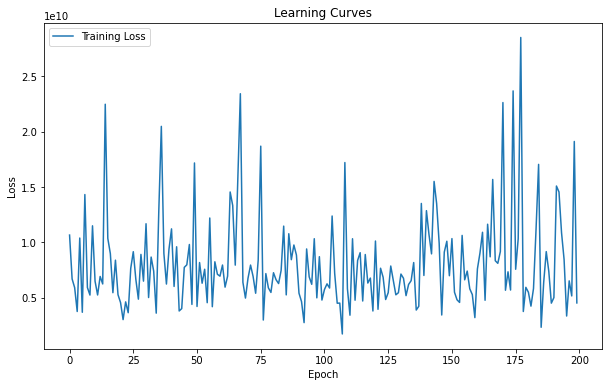

In [20]:
# Visualize learning curves
neural_net.visualize_learning_curves()